## Portfolio Performance and Risk

## Download historical data from 2018-05-01 to 2021-12-31

In [22]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import matplotlib as plt

warnings.filterwarnings("ignore")

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2018-05-01' # some stocks didnt have data before that date, so we choose this date
end = '2021-12-31'

# Tickers of assets included in portfolio construction

my_stocks =  ['FANG','CTRA','VRSK','CPRT','HES','MNST','BF-B','ETSY','BKNG','EL','ROL','NKE']
my_etfs= ['VCSH', 'SHYG','IGSB']
my_leveragedetfs = [ 'ROM', 'UBOT']


all_assets = my_stocks + my_etfs + my_leveragedetfs


# Downloading data for stock portfolio
data = yf.download(my_stocks, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = [col[1] for col in data.columns]
## Calculating returns
stock_returns = data[my_stocks].pct_change().dropna()
display(stock_returns.head())

[*********************100%***********************]  12 of 12 completed


,FANG,CTRA,VRSK,CPRT,HES,MNST,BF-B,ETSY,BKNG,EL,ROL,NKE
Date,,,,,,,,,,,,
2018-05-02,0.6401%,-0.6675%,-6.2705%,0.2710%,-0.0694%,-4.4928%,-3.1537%,1.4842%,-1.3568%,-8.5144%,-0.6348%,0.2350%
2018-05-03,-1.8694%,-3.0659%,0.6100%,0.9266%,0.3125%,-0.7777%,2.8284%,0.2600%,0.1112%,1.1540%,0.1236%,-1.9924%
2018-05-04,0.6245%,1.5165%,1.7394%,1.0329%,1.5920%,0.8603%,1.0858%,-0.8428%,1.0919%,1.2078%,1.9761%,1.7937%
2018-05-07,2.3095%,-1.7499%,1.2993%,-0.7194%,0.8687%,1.0425%,-0.3938%,2.7133%,0.8848%,-1.4366%,1.0698%,1.8209%
2018-05-08,3.4398%,1.3901%,-0.0675%,1.4493%,2.8538%,-0.4314%,-0.3415%,0.0000%,-1.5198%,1.8013%,-0.3195%,-1.2691%


In [3]:
# Calculate the Historical Return series of an equal-weighted portfolio of stocks
stock_port_weights_st = [1/12]*len(my_stocks)
weighted_returns_st = (stock_port_weights_st * stock_returns)
stock_port_ret_st = weighted_returns_st.sum(axis=1) # Historical Returns of the Stock Portion
stock_port_ret_st = pd.DataFrame(stock_port_ret_st)
stock_port_ret_st.columns = ['MY_STOCK_Portf']
display(stock_port_ret_st.head())

,MY_STOCK_Portf
Date,
2018-05-02,-1.8775%
2018-05-03,-0.1149%
2018-05-04,1.1398%
2018-05-07,0.6424%
2018-05-08,0.5821%


In [5]:
# Collect the returns data for the ETFs
# Downloading data for stock portfolio
data_etf = yf.download(my_etfs, start = start, end = end)
data_etf = data_etf.loc[:,('Adj Close', slice(None))]
data_etf.columns = my_etfs
#Calculating returns
etf_returns = data_etf[my_etfs].pct_change().dropna()
etf_returns = pd.DataFrame(etf_returns)
display(etf_returns.head())

[*********************100%***********************]  3 of 3 completed


,VCSH,SHYG,IGSB
Date,,,
2018-05-02,0.0483%,-0.0215%,0.0514%
2018-05-03,0.0193%,0.0644%,0.0897%
2018-05-04,0.0097%,0.0858%,-0.0128%
2018-05-07,-0.0096%,0.0644%,0.0256%
2018-05-08,-0.0097%,-0.1500%,-0.0384%


In [6]:
# Calculate the Historical Return series of an equal-weighted portfolio of ETFs
etf_port_weights = [1/3]*len(my_etfs)
weighted_returns_etf = (etf_port_weights * etf_returns)
ETF_bond_ret = weighted_returns_etf.sum(axis=1) # Historical Returns of the Stock Portion
ETF_bond_ret = pd.DataFrame(ETF_bond_ret)
ETF_bond_ret.columns = ['ETF_bond_ret']
display(ETF_bond_ret.head())

,ETF_bond_ret
Date,
2018-05-02,0.0261%
2018-05-03,0.0578%
2018-05-04,0.0275%
2018-05-07,0.0268%
2018-05-08,-0.0660%


In [8]:
# Downloading data for stock portfolio

# Collect the returns data for the Leveraged ETFs
data_TE = yf.download(my_leveragedetfs, start = start, end = end)
data_TE = data_TE.loc[:,('Adj Close', slice(None))]
data_TE.columns = my_leveragedetfs
#Calculating returns
leveragedetf_returns = data_TE[my_leveragedetfs].pct_change().dropna()
leveragedetf_returns = pd.DataFrame(leveragedetf_returns)
display(leveragedetf_returns.head())


[*********************100%***********************]  2 of 2 completed


,ROM,UBOT
Date,,
2018-05-02,0.0426%,0.1931%
2018-05-03,0.3722%,-0.3374%
2018-05-04,3.9415%,2.9981%
2018-05-07,1.8858%,2.0188%
2018-05-08,0.4402%,1.9788%


In [9]:
# Calculate the Historical Return series of an equal-weighted portfolio of Leveraged ETFs
leveraged_etf_weights = [1/2]*len(my_leveragedetfs)
weighted_returns_TE = (leveraged_etf_weights * leveragedetf_returns)
ETF_lev_ret = weighted_returns_TE.sum(axis=1) # Historical Returns of the Stock Portion
ETF_lev_ret = pd.DataFrame(ETF_lev_ret)
ETF_lev_ret.columns = ['ETF_lev_ret']
display(ETF_lev_ret.head())

,ETF_lev_ret
Date,
2018-05-02,0.1178%
2018-05-03,0.0174%
2018-05-04,3.4698%
2018-05-07,1.9523%
2018-05-08,1.2095%


In [10]:
# Now, combine the historical returns of the ETFs with the Stock Portfolio Returns
merge1 = pd.merge(ETF_bond_ret, stock_port_ret_st,  on='Date')
all_returns = pd.merge(merge1, ETF_lev_ret,  on='Date')
display(all_returns.head())

,ETF_bond_ret,MY_STOCK_Portf,ETF_lev_ret
Date,,,
2018-05-02,0.0261%,-1.8775%,0.1178%
2018-05-03,0.0578%,-0.1149%,0.0174%
2018-05-04,0.0275%,1.1398%,3.4698%
2018-05-07,0.0268%,0.6424%,1.9523%
2018-05-08,-0.0660%,0.5821%,1.2095%


In [11]:
import riskfolio as rp


# Building the portfolio object
port = rp.Portfolio(returns=all_returns)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

# In this case, a decay factor of 0.94 gives slightly more weight to the more recent observations in the calculation of the covariance matrix.
port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94) 
#port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=1) 

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = ((0.0330/100)/365) # Risk free rate as of dec 31, 2021
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w)

,weights
ETF_bond_ret,72.3890%
MY_STOCK_Portf,27.6110%
ETF_lev_ret,0.0000%


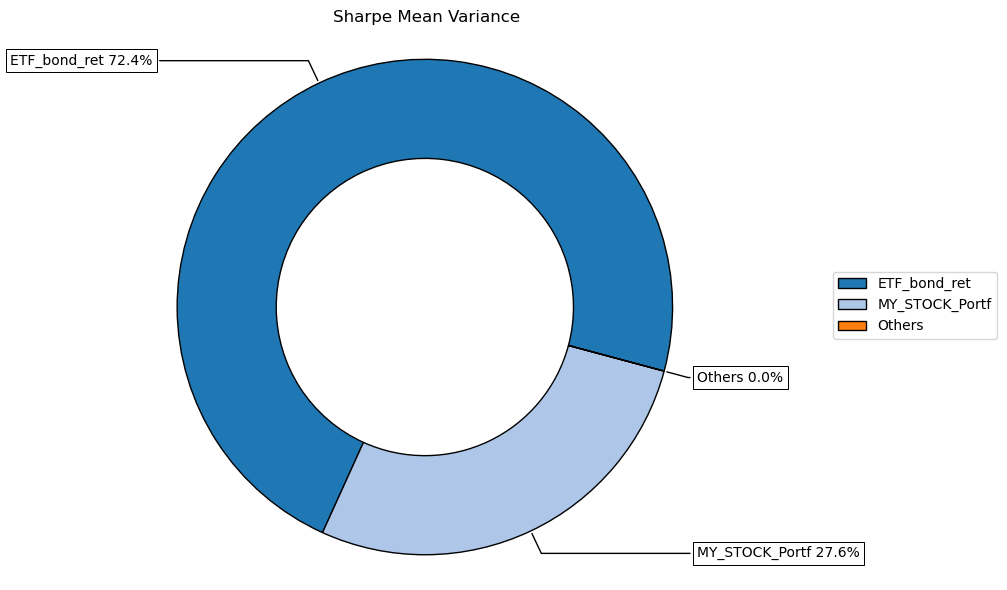

In [12]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

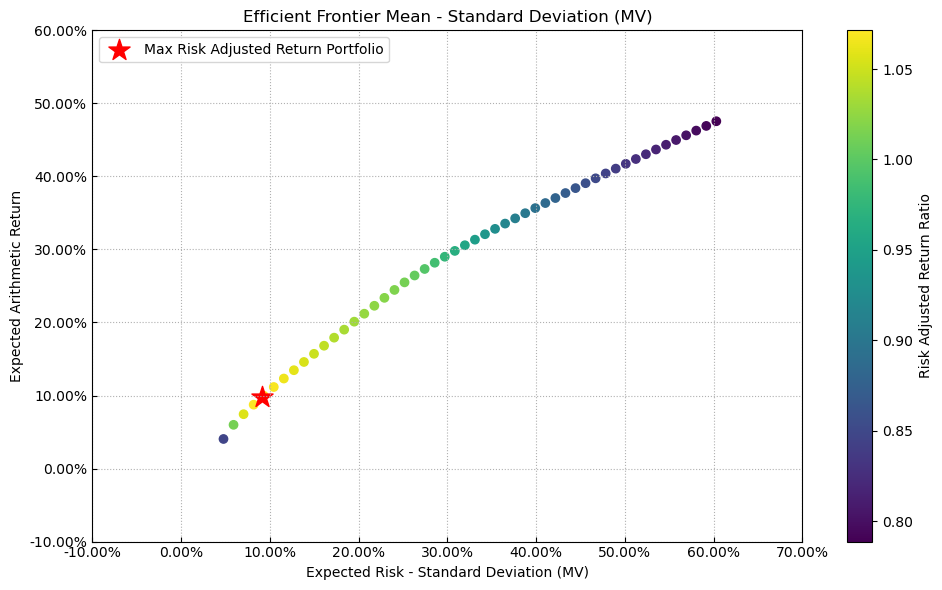

In [13]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

AttributeError: module 'matplotlib' has no attribute 'show'

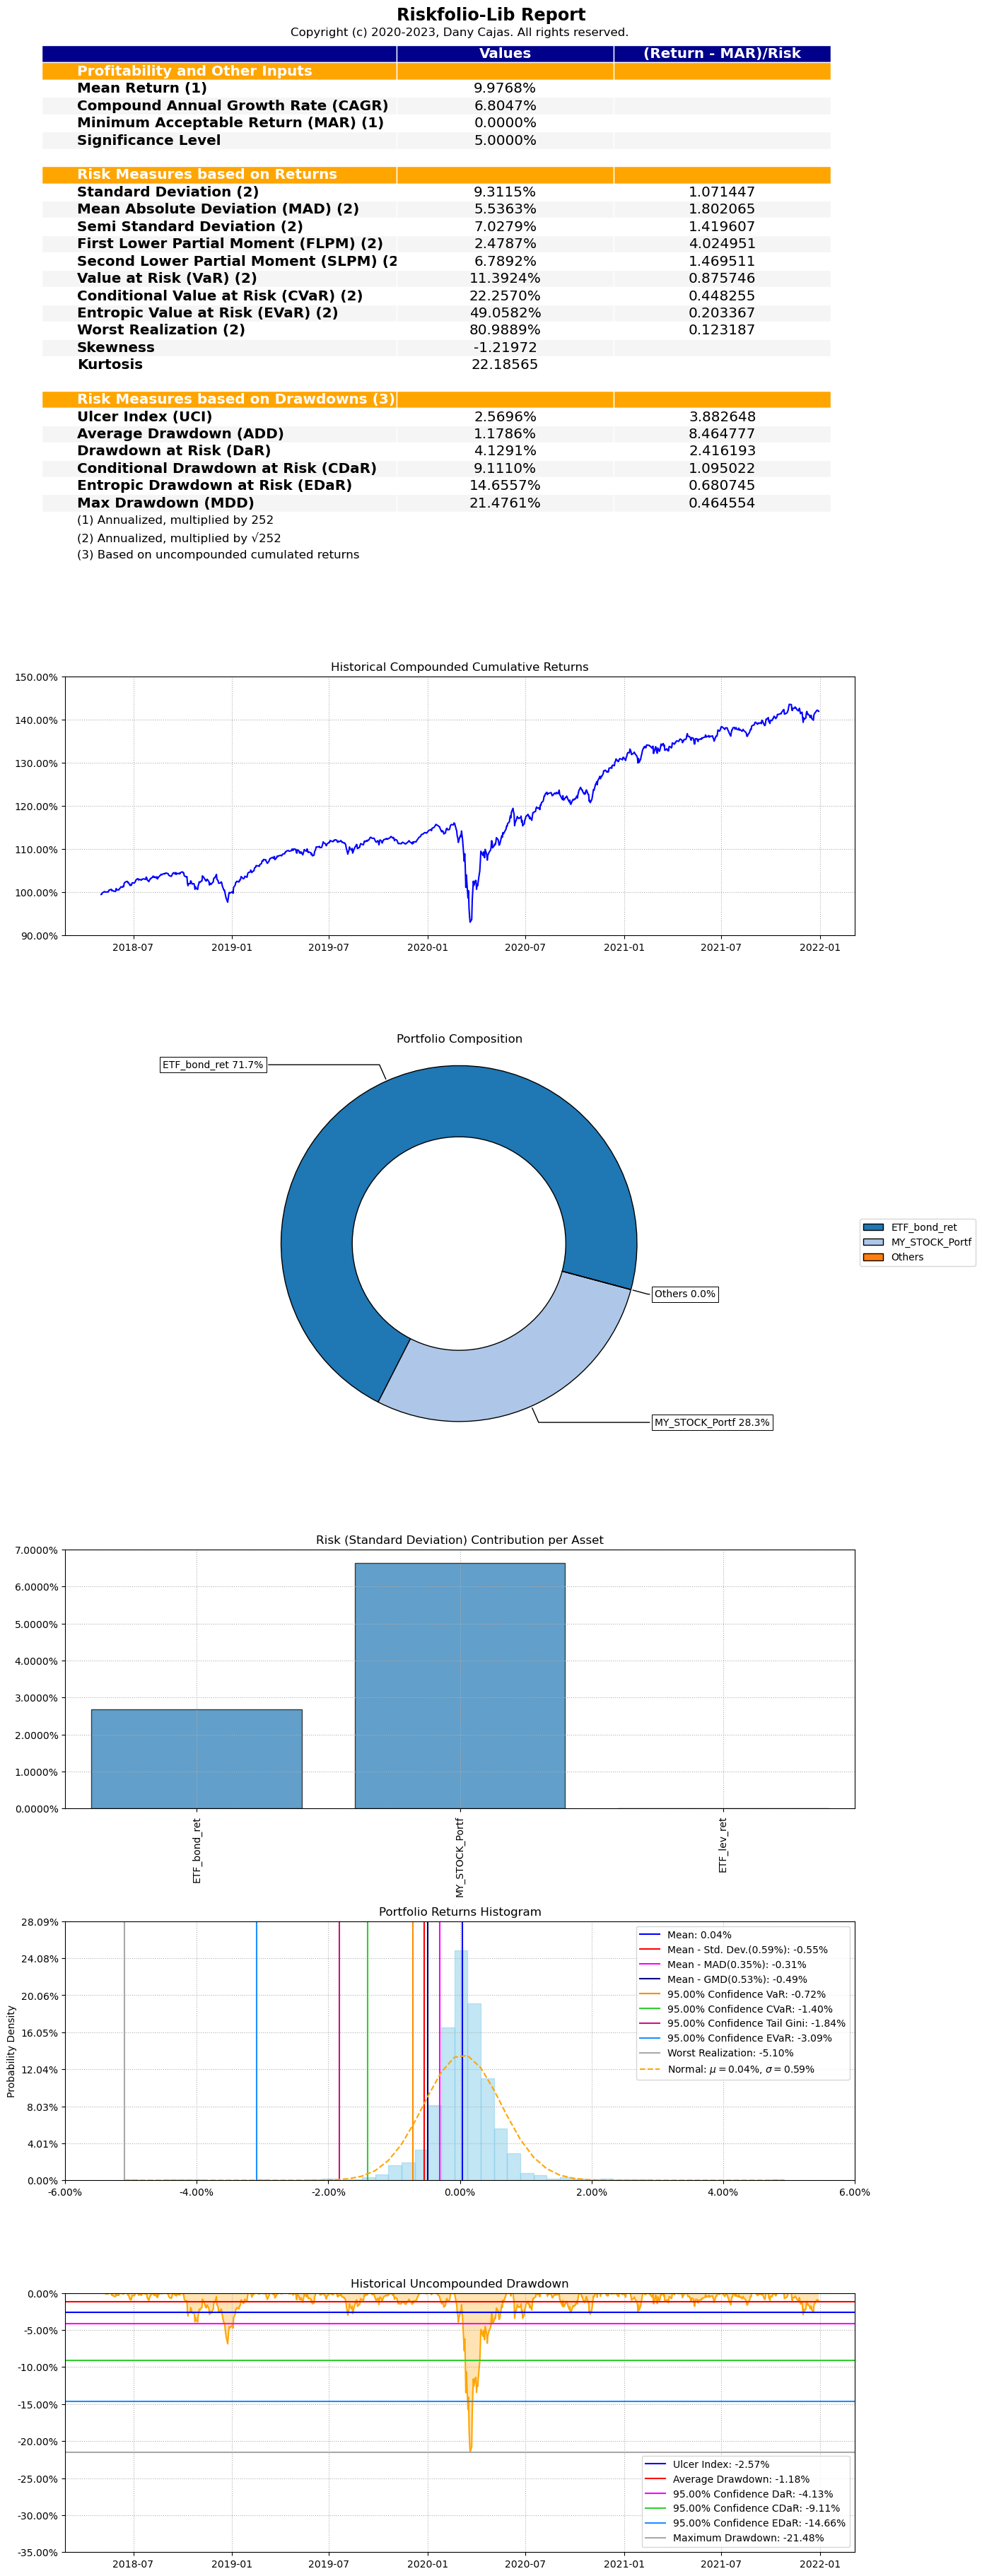

In [23]:
ax = rp.jupyter_report(returns,pd.DataFrame(frontier[4]), rm=rm)
plt.show()

In [24]:

# asset_classes = {'Assets': ['ETSY', 'MCD', 'DPZ', 'MNST', 'EL', 'CNX', 'FANG'], 
#                  'Group': ['ETF', 'ETF','LEVETF_port_ret', 'MY_STOCKS']}

asset_classes = {'Assets': ['ETF_bond_ret', 'MY_STOCK_Portf','ETF_lev_ret'], 
                 'Group': ['BOND_ETF', 'MY_STOCKS','LEVER_ETF']} # Cris pointed out the names 

asset_classes = pd.DataFrame(asset_classes)
#asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, False, True],
               'Type': ['Classes', 'Classes', 'Classes'],
               'Set': ['Group', 'Group', 'Group'],
               'Position': ['BOND_ETF', 'MY_STOCKS','LEVER_ETF'],
               'Sign': ['>=', '>=', '>='],
               'Weight': [0.1, 0.5, 0.1],
               'Type Relative': ['', '', ''],
               'Relative Set': ['', '', ''],
               'Relative': ['', '', ''],
               'Factor': ['', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,Classes,Group,BOND_ETF,>=,10.0000%,,,,
1,False,Classes,Group,MY_STOCKS,>=,50.0000%,,,,
2,True,Classes,Group,LEVER_ETF,>=,10.0000%,,,,


In [25]:
asset_classes

,Assets,Group
0,ETF_bond_ret,BOND_ETF
1,MY_STOCK_Portf,MY_STOCKS
2,ETF_lev_ret,LEVER_ETF


In [26]:
A, B = rp.assets_constraints(constraints, asset_classes)
print(A)
print(B)

[[1 0 0]
 [0 1 0]]
[[0.1]
 [0.5]]


In [27]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = ((0.0330/100)/365) # Risk free rate as of dec 31, 2021

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.transpose())

,ETF_bond_ret,MY_STOCK_Portf,ETF_lev_ret
weights,50.0000%,50.0000%,0.0000%


In [28]:
w.T

,ETF_bond_ret,MY_STOCK_Portf,ETF_lev_ret
weights,50.0000%,50.0000%,0.0000%


In [29]:
my_weights = w.T
my_weights.columns = ['BOND_ETF', 'MY_STOCKS','LEVER_ETF']
display(my_weights)

,BOND_ETF,MY_STOCKS,LEVER_ETF
weights,50.0000%,50.0000%,0.0000%


In [30]:
# double checking the order and mapping
print("my_weights['BOND_ETF']: ", my_weights['BOND_ETF'])
print("my_weights['MY_STOCKS']: ", my_weights['MY_STOCKS'])
print("my_weights['LEVER_ETF']: ", my_weights['LEVER_ETF'])

my_weights['BOND_ETF']:  weights   50.0000%
Name: BOND_ETF, dtype: float64
my_weights['MY_STOCKS']:  weights   50.0000%
Name: MY_STOCKS, dtype: float64
my_weights['LEVER_ETF']:  weights   0.0000%
Name: LEVER_ETF, dtype: float64


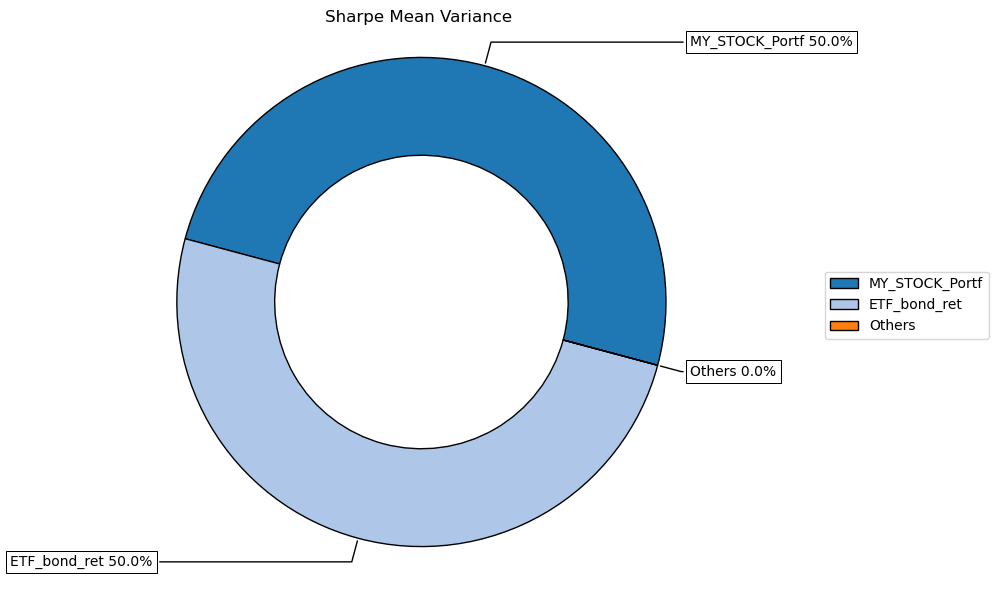

In [31]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.01, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


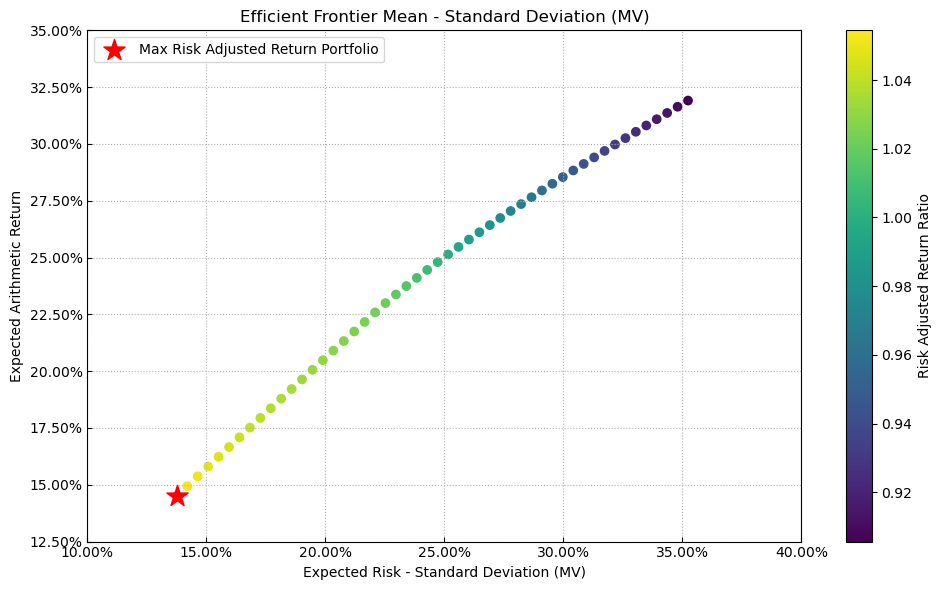

In [32]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)


AttributeError: module 'matplotlib' has no attribute 'show'

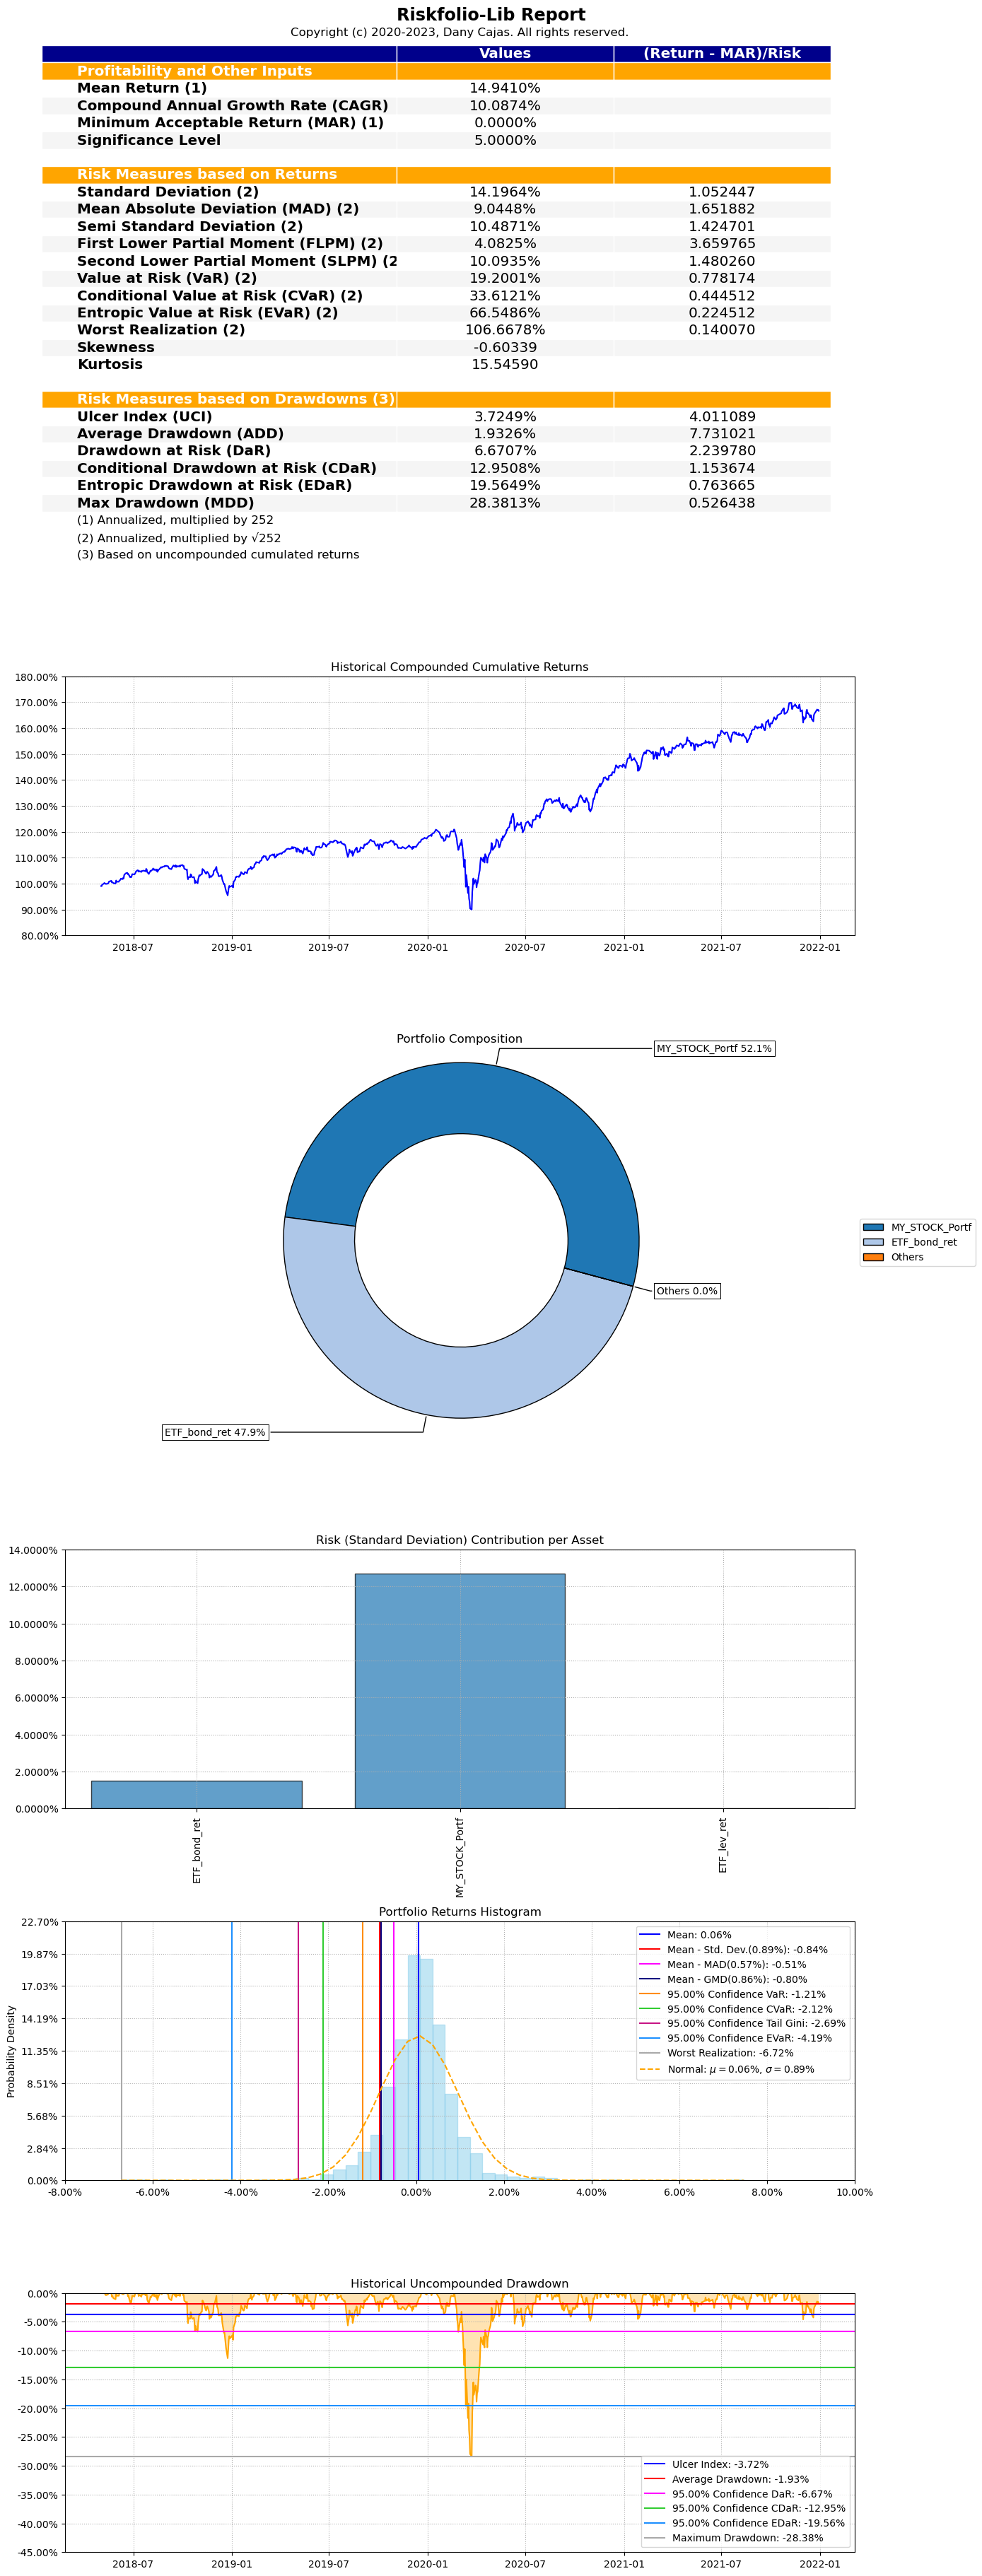

In [33]:
ax = rp.jupyter_report(returns,pd.DataFrame(frontier[1]), rm=rm)
plt.show()

#### We constructed a portfolio consisting of our  12 Stocks + 3 ETFs + 2 Thematic ETFs  and our ETFs in 2021-Dec with the weights given in 'w'

### When you construct the portfolio in 2021-Dec, what would be your estimate of the 5%-VaR of your portfolio? ## Use historical data of returns and volatility to run simulations of your portfolio value. 

In [20]:
warnings.filterwarnings("ignore")

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2018-05-01' # some stocks didnt have data before that date, so we choose this date
end = '2021-12-31'

# Tickers of assets

my_stocks =  ['FANG','CTRA','VRSK','CPRT','HES','MNST','BF-B','ETSY','BKNG','EL','ROL','NKE']
my_etfs= ['VCSH', 'SHYG','IGSB']
#my_leveragedetfs = [ 'ROM', 'UBOT']  # optimization code assigned 0 weightage & hence not including Leveraged ETFs. 

all_assets_SIM = my_stocks + my_etfs 

# Downloading data for stock portfolio
data_sim = yf.download(all_assets_SIM, start = start, end = end)
data_sim = data_sim.loc[:,('Adj Close', slice(None))]
data_sim.columns = [col[1] for col in data_sim.columns]
## Calculating returns
stock_returns_sim = data_sim[all_assets_SIM].pct_change().dropna()
display(stock_returns_sim.head(3))


[*********************100%***********************]  15 of 15 completed


,FANG,CTRA,VRSK,CPRT,HES,MNST,BF-B,ETSY,BKNG,EL,ROL,NKE,VCSH,SHYG,IGSB
Date,,,,,,,,,,,,,,,
2018-05-02 00:00:00-04:00,0.6401%,-0.6675%,-6.2705%,0.2710%,-0.0694%,-4.4928%,-3.1537%,1.4842%,-1.3568%,-8.5144%,-0.6349%,0.2349%,0.0513%,-0.0215%,0.0483%
2018-05-03 00:00:00-04:00,-1.8694%,-3.0659%,0.6100%,0.9266%,0.3124%,-0.7777%,2.8284%,0.2600%,0.1112%,1.1540%,0.1237%,-1.9924%,0.0898%,0.0644%,0.0193%
2018-05-04 00:00:00-04:00,0.6245%,1.5165%,1.7394%,1.0329%,1.5920%,0.8603%,1.0858%,-0.8428%,1.0919%,1.2079%,1.9761%,1.7937%,-0.0128%,0.0858%,0.0096%


In [21]:
PORTFOLIO_VALUE = 10000000 # 10 mil
# Value invested on each asset equal $value for an equal-weighted portfolio 
VALUE_PER_Stock = PORTFOLIO_VALUE*0.5/12
VALUE_PER_Bond = PORTFOLIO_VALUE*0.5/3

#START_DATE = '2019-01-01'
#END_DATE = '2021-12-31'
T = 252   # simulating for 1 year horizon 
N_SIMS = 1000

In [22]:
# Calculate the # of shares per security based on 50% portion of stocks, and 50% of bond etf fund
# get the price of each stock as of dec 31st, 2021
Initial_price = data_sim.values[len(data_sim)-1, :]
Initial_Stock_price=Initial_price[:12]
Initial_Bond_price= Initial_price[-3:]
SHARES_stock = VALUE_PER_Stock /Initial_Stock_price
SHARES_bond = VALUE_PER_Bond/ Initial_Bond_price
SHARES = np.concatenate((SHARES_stock, SHARES_bond))
# np.round(SHARES, 0)

In [23]:
Initial_Bond_price

array([ 42.62295914,  79.53625488, 226.50588989])

In [24]:
## Calculate the covariance matrix:

cov_mat = stock_returns_sim.cov()

## Perform the Cholesky decomposition of the covariance matrix:

chol_mat = np.linalg.cholesky(cov_mat)


In [25]:
# Draw the correlated random numbers from the Standard Normal distribution:

rv = np.random.normal(size=(N_SIMS, len(all_assets_SIM)))
correlated_rv = np.transpose(np.matmul(chol_mat, np.transpose(rv)))
display(correlated_rv)

## Define the metrics that will be used for simulations:
r = np.mean(stock_returns_sim, axis=0).values
sigma = np.std(stock_returns_sim, axis=0).values
S_0 = data_sim.values[(len(data_sim)-1), :]
P_0 = np.sum(SHARES * S_0)
display(r)
display(sigma)

array([[ 1.11291231e-01,  2.27521347e-02,  1.04205553e-02, ...,
         3.47593181e-03,  1.26938948e-02,  2.73844116e-03],
       [ 8.68812898e-02,  2.69935090e-02, -2.76924872e-03, ...,
        -3.31476103e-04,  1.93409318e-03, -7.21601017e-04],
       [-1.15536157e-02,  3.38492885e-02,  3.95794509e-03, ...,
        -5.81616103e-03, -9.63980343e-04, -4.73214833e-03],
       ...,
       [ 1.15884966e-02, -1.89513390e-02, -9.13591178e-03, ...,
         5.91713310e-05, -2.20441514e-03,  2.82820023e-04],
       [-1.91842076e-02, -2.83017918e-02,  2.34394030e-03, ...,
        -6.52256707e-04,  1.84006331e-03, -1.45622562e-03],
       [ 4.56456187e-02,  4.49780364e-02,  1.25016246e-02, ...,
         4.34630899e-03,  8.58619928e-03,  3.95546627e-03]])

array([0.00078938, 0.00020217, 0.00097996, 0.00136218, 0.00092125,
       0.00075206, 0.0005002 , 0.00288863, 0.00036442, 0.00123948,
       0.0006853 , 0.00120362, 0.00014512, 0.0001901 , 0.00014683])

array([0.04169058, 0.02496551, 0.0164784 , 0.01995795, 0.03377008,
       0.01790513, 0.01745672, 0.03846016, 0.02294958, 0.0198628 ,
       0.01804309, 0.01960446, 0.00270227, 0.00497051, 0.0028777 ])

In [26]:
#Calculate the terminal price of the considered stocks:
S_T = S_0 * np.exp((r - 0.5 * sigma ** 2) * T + 
                   sigma * np.sqrt(T) * correlated_rv)
pd.options.display.float_format = '{:.6f}'.format
pd.DataFrame(S_T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,75.549960,2351.838122,93.702464,24.066205,412.881295,259.285371,109.915389,128.659954,55.406585,125.010542,190.486873,42.693724,44.176490,83.263252,234.827813
1,74.339262,2355.794701,93.379722,24.065943,409.136610,257.928907,109.819317,122.283387,54.349533,124.276377,188.861164,43.213233,44.169276,83.192592,234.790698
2,69.650738,2362.204215,93.544191,23.949211,396.620121,257.802211,109.485341,127.128398,53.817437,123.046307,189.158096,43.032774,44.158885,83.173570,234.747686
3,69.280301,2355.530970,93.571034,23.989175,396.952694,256.134499,109.850982,124.578400,53.910811,124.577969,188.967529,42.651578,44.173342,83.205852,234.814153
4,70.683313,2318.337644,93.154919,23.919661,400.368166,256.819134,109.390997,124.644432,53.623419,122.985073,187.760853,42.610394,44.167075,83.161676,234.781060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,73.354447,2374.583290,94.098752,24.167800,411.721134,258.929986,110.349376,128.890273,55.676084,125.653402,189.291532,43.065233,44.170978,83.242399,234.798612
996,70.676344,2361.097691,93.303226,23.929407,401.850753,257.881895,110.179703,126.039680,54.758299,123.229713,188.658329,42.647404,44.167340,83.186014,234.788079
997,70.725709,2313.287057,93.224334,23.916537,388.749965,258.517526,109.502765,124.480279,54.598712,123.080697,188.312134,42.697715,44.170016,83.165430,234.801472
998,69.299884,2304.730512,93.504705,24.027052,393.916182,256.512349,110.373658,127.056508,53.712553,123.345375,188.901645,42.721477,44.168668,83.191975,234.782819


In [27]:
#SHARES*S_T

#Calculate the terminal portfolio value and the portfolio returns:

P_T = np.sum(SHARES * S_T, axis=1)
P_diff = P_T - P_0  # Cumulative Return fro Time=0 to Time =T
pd.DataFrame(P_diff).describe()



,0
count,1000.000000
mean,1181839.686907
std,40975.904184
min,1066196.938283
25%,1153545.990442
50%,1182317.898953
75%,1209106.059253
max,1314675.414259


In [28]:
P_T

array([11274889.55383138, 11211997.11555577, 11183485.78274301,
       11169348.42831686, 11156605.31208606, 11211776.4337263 ,
       11187243.52764736, 11222599.2557777 , 11197560.43532449,
       11140364.51625435, 11171229.08351763, 11187630.3686137 ,
       11154158.15650017, 11205565.56398539, 11174113.3421841 ,
       11217036.02365527, 11196898.3741405 , 11162326.19886312,
       11182848.82273328, 11171958.37859574, 11224653.75708047,
       11183398.28000407, 11150995.76976267, 11188613.18510474,
       11167807.99032301, 11108112.2206119 , 11150285.98015934,
       11107777.4901452 , 11203358.85510908, 11246065.02491967,
       11284199.79582739, 11199118.57260545, 11161103.07990277,
       11138764.9510759 , 11184710.72434265, 11236618.91036329,
       11224028.18160734, 11119749.96415729, 11218056.48569315,
       11179665.49444852, 11232526.66898493, 11165938.34483486,
       11106094.32238361, 11182947.04681946, 11181662.30108877,
       11124884.08146625, 11158903.77544

Portfolio Value Histogram:


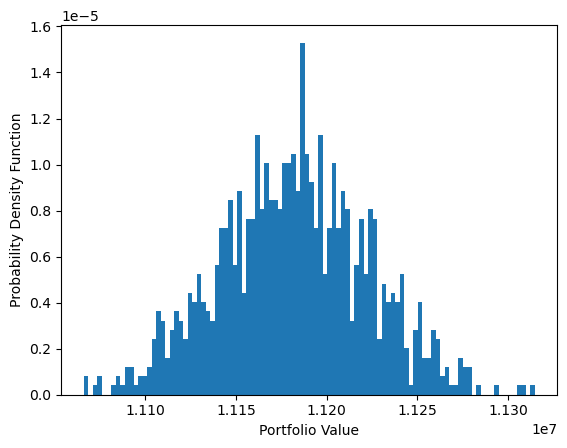

In [29]:
import matplotlib.pyplot as pl

print('Portfolio Value Histogram:')
pl.figure()
pl.hist(P_T,bins=100, density=True, stacked=True)
pl.xlabel('Portfolio Value')
pl.ylabel('Probability Density Function')
pl.show()

## 5%  VaR

In [30]:

#Calculate the VaR for the selected confidence levels:
P_diff_sorted = np.sort(P_diff)
percentiles = [5.]
#percentiles = 0.05
var = np.percentile(P_diff_sorted, percentiles)
# num_days = int(252)
# for x in range(1, num_days+1):    
#     var_array.append(np.round(var * np.sqrt(x),2))
    

for x, y in zip(percentiles, var):
    print(f'1-Year VaR with {100-x}% confidence: {-y:.2f}$')
    
# with a 95% confidence, the maximum amount we expected to lose is $15,403,984 CAD for 100,000,000$ investment 

1-Year VaR with 95.0% confidence: -1113755.62$


In [31]:
# # Calculate n Day VaR
# var_array = []
# num_days = int(15)
# for x in range(1, num_days+1):    
#     var_array.append(np.round(var * np.sqrt(x),2))
#     print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var * np.sqrt(x),2)))

# # Calculate n Day VaR
# var_array = []
# num_days = int(15)
# for x in range(1, num_days+1):    
#     var_array.append(np.round(var_1d1 * np.sqrt(x),2))
#     print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))
    
    
# # Build plot
# plt.xlabel("Day #")
# plt.ylabel("Max portfolio loss (USD)")
# plt.title("Max portfolio loss (VaR) over 15-day period")
# plt.plot(var_array, "r")

## Assume you have been holding the portfolio throughout 2022. What is your year-end P/L? What is your performance relative to TSX 60 and S&P 500 Index? 

### What has been the return of this portfolio in 2022? 
#### Let's collect the price data in 2022 and calculate

In [32]:

# Date range
start = '2022-01-01'
end = '2022-12-31'

# Tickers of assets
# my_stocks = ['ETSY', 'MCD', 'DPZ', 'MNST', 'EL', 'CNX', 'FANG']
# my_etfs= ['ZCS.TO', 'CBO.TO','ZIC.TO']
# my_leveragedetfs = [ 'ROM', 'UBOT']

my_stocks =  ['FANG','CTRA','VRSK','CPRT','HES','MNST','BF-B','ETSY','BKNG','EL','ROL','NKE']
my_etfs= ['VCSH', 'SHYG','IGSB']
my_leveragedetfs = [ 'ROM', 'UBOT']


all_assets = my_stocks + my_etfs + my_leveragedetfs

# Downloading data for stock portfolio
data_2022 = yf.download(all_assets, start = start, end = end)
data_2022 = data_2022.loc[:,('Adj Close', slice(None))]
#data_2022.columns = all_assets
data_2022.columns = [col[1] for col in data_2022.columns]
## Calculating returns
asset_returns = data_2022[all_assets].pct_change().dropna()
display(asset_returns.head())

[*********************100%***********************]  17 of 17 completed


,FANG,CTRA,VRSK,CPRT,HES,MNST,BF-B,ETSY,BKNG,EL,ROL,NKE,VCSH,SHYG,IGSB,ROM,UBOT
Date,,,,,,,,,,,,,,,,,
2022-01-04 00:00:00-05:00,0.065808,0.069494,0.000316,-0.005648,0.056908,0.012430,-0.002235,-0.042586,0.001426,0.004240,0.008631,0.010445,0.000616,-0.000442,0.001115,-0.026175,-0.007050
2022-01-05 00:00:00-05:00,-0.009144,-0.011945,-0.033464,-0.031549,-0.004066,-0.017291,0.005880,-0.062889,-0.020946,-0.042355,-0.029212,-0.024881,-0.002217,-0.004863,-0.002414,-0.073377,-0.055677
2022-01-06 00:00:00-05:00,0.046905,-0.010638,-0.007652,-0.000212,0.054683,-0.005518,-0.036465,0.045660,0.006908,-0.002022,0.019757,-0.007458,-0.001481,0.000222,-0.001675,-0.004390,-0.026134
2022-01-07 00:00:00-05:00,-0.017226,0.053275,-0.028307,-0.035835,0.016070,-0.015285,-0.015600,-0.059914,0.001897,-0.001294,0.004173,-0.025273,-0.000371,-0.000444,-0.000373,-0.017723,-0.028035
2022-01-10 00:00:00-05:00,-0.001399,-0.008817,0.000145,-0.002346,-0.016971,-0.014140,-0.034483,-0.007777,-0.003360,-0.053644,0.002672,-0.041600,-0.001113,-0.000222,-0.000746,0.009065,-0.030591


In [33]:
# the order of this is important, it will screw up the cal if the order is wrong

port_weights =[(1/float(len(my_stocks)))*my_weights.MY_STOCKS]*len(my_stocks) + [(1/float(len(my_etfs)))*my_weights.BOND_ETF]*len(my_etfs) + [(1/float(len(my_leveragedetfs)))*my_weights.LEVER_ETF]*len(my_leveragedetfs)

port_weights= np.transpose(port_weights)

weighted_asset_returns = port_weights * asset_returns
display(weighted_asset_returns.shape) # The output is a tuple with two values, the number of rows and the number of columns
port_ret_2022 = weighted_asset_returns.sum(axis=1) # Returns of the Stock Portfolio in 2022
port_ret = pd.DataFrame(port_ret_2022)
port_ret.columns = ['MY_Portfolio_Rets']

print(f'My Portfolio Return')

display(port_ret.head(3))

(250, 17)

My Portfolio Return


,MY_Portfolio_Rets
Date,
2022-01-04 00:00:00-05:00,0.007683
2022-01-05 00:00:00-05:00,-0.013327
2022-01-06 00:00:00-05:00,0.003842


In [34]:
# Cumulative Portfolio Return
C_port_ret = (port_ret + 1).cumprod()-1 # The subtraction of 1 from the result gives the total return as a percentage change relative to the initial investment

print("Portfolio Value after 1 day of Trading:")

display(C_port_ret[1:])   

print("Last Portfolio Value:")

display(C_port_ret[(len(C_port_ret)-1):])   


Portfolio Value after 1 day of Trading:


,MY_Portfolio_Rets
Date,
2022-01-05 00:00:00-05:00,-0.005746
2022-01-06 00:00:00-05:00,-0.001926
2022-01-07 00:00:00-05:00,-0.007252
2022-01-10 00:00:00-05:00,-0.015113
2022-01-11 00:00:00-05:00,-0.007753
...,...
2022-12-23 00:00:00-05:00,-0.013870
2022-12-27 00:00:00-05:00,-0.014594
2022-12-28 00:00:00-05:00,-0.025238


Last Portfolio Value:


,MY_Portfolio_Rets
Date,
2022-12-30 00:00:00-05:00,-0.017499


In [35]:
## Total portfolio value by the end of 2022-Dec 

Portfolio_Value = 10000000


Cum_returns = C_port_ret[(len(C_port_ret)-1):] 

Cum_returns = Cum_returns.iloc[0] * Portfolio_Value

print("Total Portfolio Value by the end of 2022-Dec : ", Cum_returns)

    


Total Portfolio Value by the end of 2022-Dec :  MY_Portfolio_Rets   -174985.510806
Name: 2022-12-30 00:00:00-05:00, dtype: float64


In [36]:
###  Import S&P/TSX 60 Index
####  "S&P/TSX 60" index data has been downloaded from - https://www.spglobal.com/spdji/en/indices/equity/sp-tsx-60-index/#overview

sp_tsx_60 = pd.read_excel('PerformanceGraphExport_USD.xls',
                         sheet_name='Performance Graph', index_col=0)

sp_tsx_60.head()

sp_tsx_60.index.rename('Date', inplace=True)
sp_tsx_60.index = pd.to_datetime(sp_tsx_60.index).tz_localize('UTC').tz_convert('America/New_York')
sp_tsx_60.index = pd.to_datetime(sp_tsx_60.index)

print(f'S&P/TSX_60_Index_USD_TR')

display(sp_tsx_60.head(3))


S&P/TSX_60_Index_USD_TR


,S&P/TSX_60_Index_(USD)_(TR)
Date,
2020-02-09 19:00:00-05:00,475.530000
2020-02-10 19:00:00-05:00,477.310000
2020-02-11 19:00:00-05:00,480.230000


In [37]:
#Just for the year 2022
start = '2022-01-01'
end = '2022-12-31'
mask = (sp_tsx_60.index >= start) & (sp_tsx_60.index <= end)
sp_tsx_60 = sp_tsx_60.loc[mask]
display(sp_tsx_60.head(3))
display(sp_tsx_60.tail(3))

,S&P/TSX_60_Index_(USD)_(TR)
Date,
2022-01-03 19:00:00-05:00,645.790000
2022-01-04 19:00:00-05:00,639.730000
2022-01-05 19:00:00-05:00,638.530000


,S&P/TSX_60_Index_(USD)_(TR)
Date,
2022-12-27 19:00:00-05:00,562.130000
2022-12-28 19:00:00-05:00,569.010000
2022-12-29 19:00:00-05:00,566.220000


In [38]:
# Create cumulative return for the index S&P/TSX 60 Index
index_returns = sp_tsx_60.pct_change().dropna()
display(index_returns.head(3))

,S&P/TSX_60_Index_(USD)_(TR)
Date,
2022-01-04 19:00:00-05:00,-0.009384
2022-01-05 19:00:00-05:00,-0.001876
2022-01-06 19:00:00-05:00,0.007752


In [39]:
# Cumulative Portfolio Return
C_index_ret = (index_returns + 1).cumprod()-1 # The subtraction of 1 from the result gives the total return as a percentage change relative to the initial investment

print("Last Portfolio Value:")
display(C_index_ret[(len(C_index_ret)-1):])  
#display(C_index_ret.head(3))


Last Portfolio Value:


,S&P/TSX_60_Index_(USD)_(TR)
Date,
2022-12-29 19:00:00-05:00,-0.123213


In [40]:
# Import S&P 500 Index
SP500 = pd.read_excel('PerformanceGraphExport_S_P.xls',
                         sheet_name='Performance Graph', index_col='Effective_date')

SP500.index.rename('Date', inplace=True)
SP500.index = pd.to_datetime(SP500.index).tz_localize('UTC').tz_convert('America/New_York')
#sp_tsx_60.index = pd.to_datetime(sp_tsx_60.index)
print(SP500.index.dtype)
display(SP500.head(3))


datetime64[ns, America/New_York]


,S&P_500_USD
Date,
2020-02-09 19:00:00-05:00,6811.830000
2020-02-10 19:00:00-05:00,6823.590000
2020-02-11 19:00:00-05:00,6867.920000


In [41]:
#Just for the year 2022
start = '2022-01-01'
end = '2022-12-31'
mask = (SP500.index >= start) & (SP500.index <= end)
SP500 = SP500.loc[mask]
display(SP500.head(3))
display(SP500.tail(3))

,S&P_500_USD
Date,
2022-01-02 19:00:00-05:00,10050.410000
2022-01-03 19:00:00-05:00,10044.750000
2022-01-04 19:00:00-05:00,9850.700000


,S&P_500_USD
Date,
2022-12-27 19:00:00-05:00,8056.620000
2022-12-28 19:00:00-05:00,8198.360000
2022-12-29 19:00:00-05:00,8178.020000


In [42]:
# Create cumulative return for the index S&P/TSX 60 Index
sp_index_returns = SP500.pct_change().dropna()
display(sp_index_returns.head(3))

,S&P_500_USD
Date,
2022-01-03 19:00:00-05:00,-0.000563
2022-01-04 19:00:00-05:00,-0.019319
2022-01-05 19:00:00-05:00,-0.000891


In [43]:
# Cumulative Portfolio Return
C_SPindex_ret = (sp_index_returns + 1).cumprod()-1 # The subtraction of 1 from the result gives the total return as a percentage change relative to the initial investment

print("Last Portfolio Value:")
display(C_SPindex_ret[(len(C_SPindex_ret)-1):])  
#display(C_index_ret.head(3))


Last Portfolio Value:


,S&P_500_USD
Date,
2022-12-29 19:00:00-05:00,-0.186300


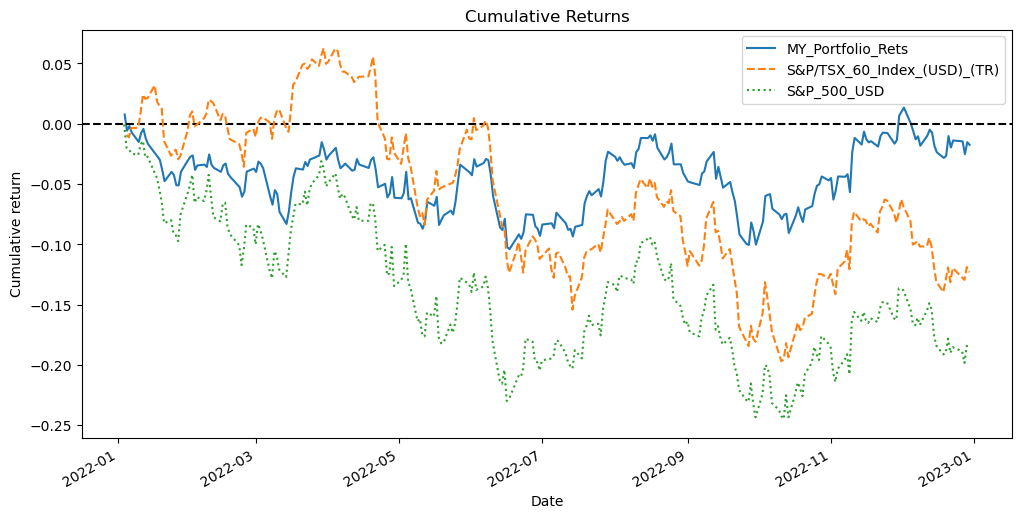

In [44]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)
C_port_ret.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative return')
ax1.set_title('Cumulative Returns')
ax1.axhline(0, color='black', linestyle='--')

# add another data series
C_index_ret.plot(ax=ax1, label='TSX60', linestyle='--')
C_SPindex_ret.plot(ax=ax1, label='SP', linestyle=':')

ax1.legend()
plt.show()

#Add cumulative returns for S&P INdex 

Portfolio Value Histogram:


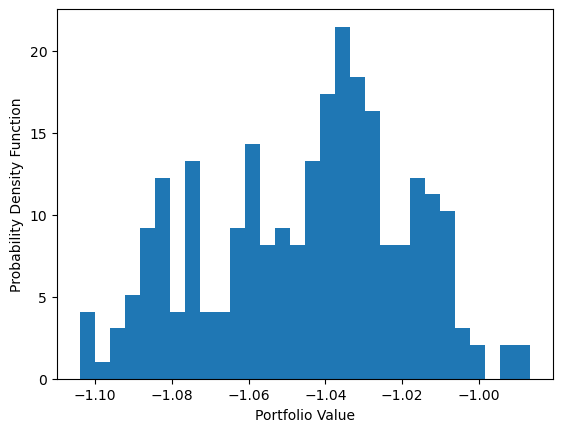

In [45]:
# import matplotlib.mlab as mlab
# import matplotlib.pyplot as plt
# # Repeat for each equity in portfolio
# C_port_ret.hist(bins=30, normed=True,histtype="stepfilled",alpha=0.5)
# x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
# plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
# plt.title("AAPL returns (binned) vs. normal distribution")
# plt.show()

import matplotlib.pyplot as pl

print('Portfolio Value Histogram:')
pl.figure()
pl.hist((C_port_ret-1),bins=30, density=True, stacked=True)
#pl.hist((C_port_ret),bins=20, density=True, stacked=True)
pl.xlabel('Portfolio Value')
pl.ylabel('Probability Density Function')
pl.show()
